In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\91912\Downloads\3472386-auto-mpg\auto-mpg.csv")

In [5]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


## Auto MPG Dataset: Column Explanations

**mpg**
Miles per gallon (MPG), a measure of fuel efficiency for the car. Higher values indicate better fuel economy.

**cylinders**
The number of cylinders in the engine, typically 4, 6, or 8. More cylinders generally indicate a more powerful engine.

**displacement**
Engine displacement in cubic inches. It refers to the total volume of air/fuel mixture an engine can draw in during one cycle.

**horsepower**
The engine’s power output, measured in horsepower. Higher values indicate more powerful engines.

**weight**
The vehicle’s weight in pounds. Heavier vehicles generally have lower fuel efficiency.

**acceleration**
The time it takes for the car to accelerate from 0 to 60 mph, measured in seconds. Lower values indicate quicker acceleration.

**model year**
The year the car model was released. Ranges from 1970 to 1982 in the dataset.

**origin**
The region where the car was manufactured. 1 = USA, 2 = Europe, 3 = Japan.

**car name**
The name of the car model.

### Data Exploration

In [9]:
df.shape

(398, 9)

In [8]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [24]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

### Data Cleaning

#### Droping "car name" column as it is not so useful.

In [12]:
df.drop(["car name"],axis = 1,inplace = True)

In [14]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')

#### Mapping Origin Column with region names for better understanding(1 = USA, 2 = Europe, 3 = Japan).

In [71]:
df["origin"] = df["origin"].map({1:"USA",
                                2:"Europe",
                               3:"Japan"})

In [19]:
df["origin"].value_counts()

origin
USA       249
Japan      79
Europe     70
Name: count, dtype: int64

#### Handling Missing Values in "horsepower" column of the Data.

In [9]:
try :
    df["horsepower"].astype("int64")
except Exception as e:
    print(e)

invalid literal for int() with base 10: '?'


In [13]:
hp_is_digit = pd.DataFrame(df["horsepower"].str.isdigit())
df[hp_is_digit["horsepower"]==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [17]:
df["horsepower"] = df["horsepower"].replace("?", np.nan)

In [19]:
df[hp_is_digit["horsepower"]==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,1,amc concord dl


In [21]:
df["horsepower"].dtype

dtype('O')

In [23]:
df["horsepower"] = df["horsepower"].astype("float64")

In [25]:
df["horsepower"].dtype

dtype('float64')

In [27]:
df["horsepower"].median()

93.5

In [31]:
df["horsepower"] = df["horsepower"].fillna(df["horsepower"].median())

In [33]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


### Visualisations and Insights.

#### 1. What is the distribution of mpg in the dataset ?

Text(0, 0.5, 'Count')

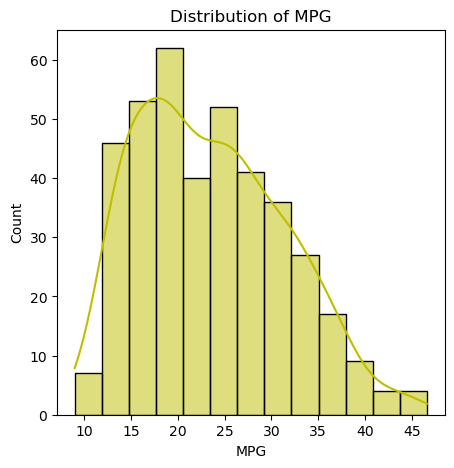

In [29]:
plt.figure(figsize = (5,5))
sns.histplot(data = df,x = "mpg",kde = True,color = "y")
plt.title("Distribution of MPG")
plt.xlabel("MPG")
plt.ylabel("Count")

#### 2. How many cars are from each orgin (USA,Europe,Japan) ?

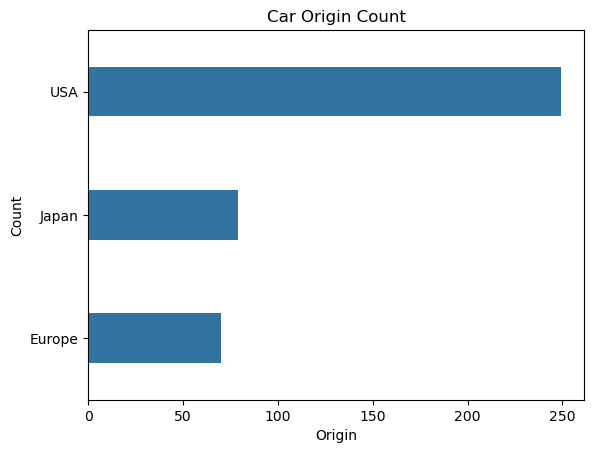

In [31]:
sns.countplot(data= df, y='origin', width = 0.4)
plt.title('Car Origin Count')
plt.xlabel('Origin')
plt.ylabel('Count')
plt.show()

#### 3.What is proportion of  cars are from each origin (USA, Europe, Japan)?

In [35]:
car_counts = df["origin"].value_counts(normalize = True)*100
car_counts

origin
USA       62.562814
Japan     19.849246
Europe    17.587940
Name: proportion, dtype: float64

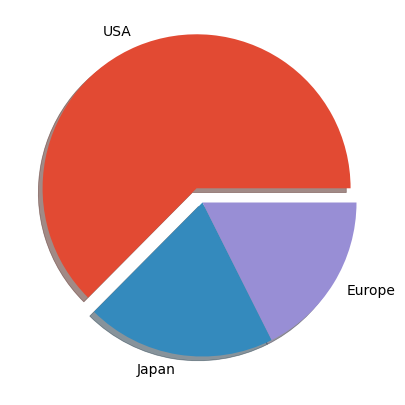

In [37]:
plt.figure(figsize = (5,5))
plt.pie(car_counts,labels = car_counts.index,colors = plt.style.use("ggplot"),
       shadow = True,explode = [0.1,0,0]);

#### 4. What percentage of cars belong to each cylinder category?

In [41]:
cylinder_count = df["cylinders"].value_counts()
cylinder_count

cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64

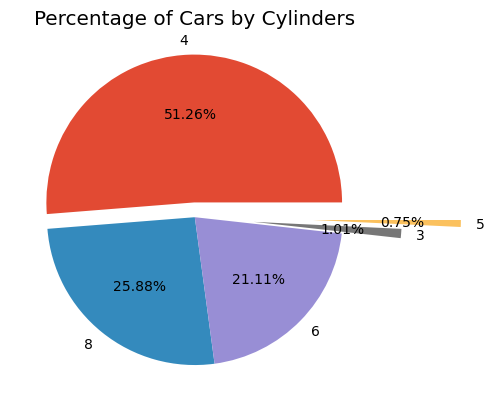

In [51]:
plt.pie(cylinder_count,
        labels = cylinder_count.index,
        autopct="%1.2f%%",
        explode=[0.1,0,0,0.4,0.8])
plt.title('Percentage of Cars by Cylinders')
plt.ylabel('')
plt.show()

#### 5. What is the relationship between horsepower and weight of cars?

In [36]:
df[["horsepower","weight"]].corr()

,horsepower,weight
horsepower,1.000000,0.862442
weight,0.862442,1.000000


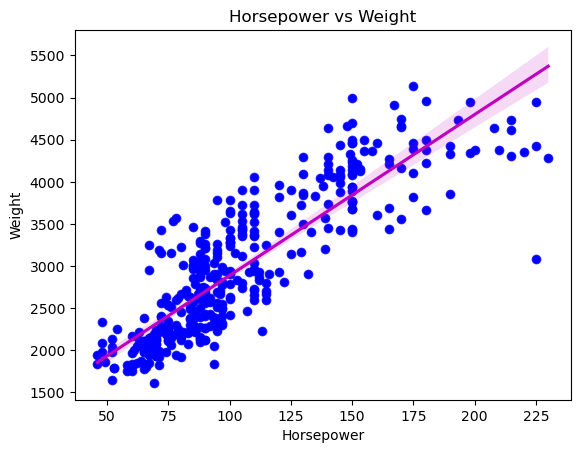

In [46]:
sns.scatterplot(data= df, x='horsepower', y='weight',color = "b")
sns.regplot(data= df, x='horsepower', y='weight',scatter_kws = {"color":"b"},line_kws = {"color":"m"})
plt.title('Horsepower vs Weight')
plt.xlabel('Horsepower')
plt.ylabel('Weight')
plt.show()

#### 6.How does MPG vary across different number of Cylinders ?

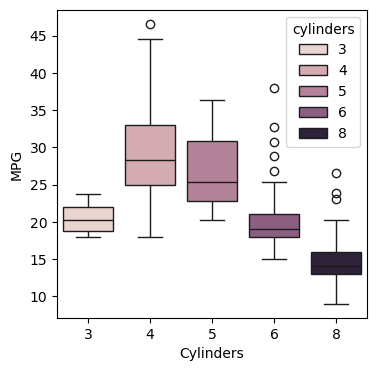

In [50]:
plt.figure(figsize = (4,4))
sns.boxplot(data = df,x = "cylinders",y="mpg",hue = "cylinders")
plt.xlabel("Cylinders")
plt.ylabel("MPG")
plt.show()

**Insight** : 4,5 - Cylinder car are more fuel efficient(higher mpg) than 8- cylinder cars

#### 7.How does horsepower vary across different number of Cylinders ?

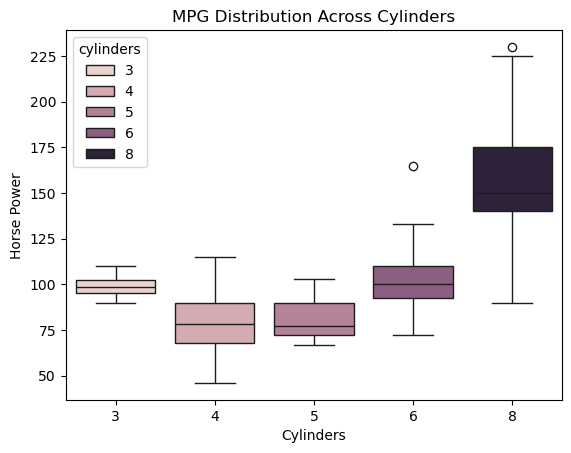

In [58]:
sns.boxplot(data= df, x='cylinders', y='horsepower',hue = "cylinders")
plt.title('MPG Distribution Across Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('Horse Power')
plt.show()

**Insight** : 8-cylinder cars have more powerful engines (high horse power) than 4-5 cylinder cars

### 8. What are the relationships among horsepower, and acceleration ?

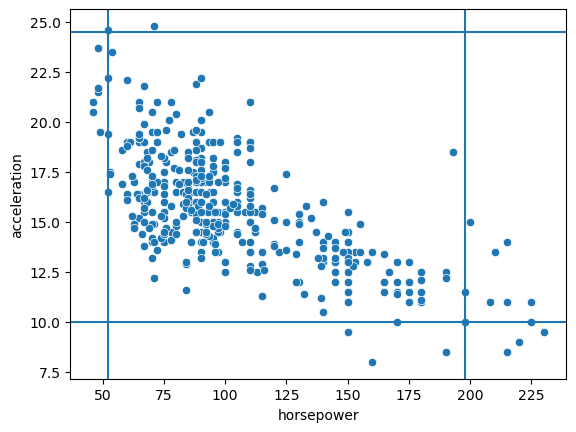

In [63]:
sns.scatterplot(x = df["horsepower"], y = df["acceleration"])
plt.axvline(198, )
plt.axhline(10)
plt.axvline(52)
plt.axhline(24.5)

**Insight** : High horse power cars have less time to accelerate (0-60mph) compared to low horse power cars

#### 9.How does horsepower vary by origin?

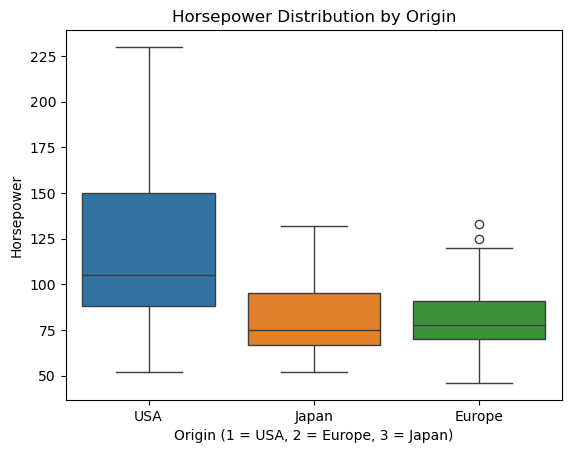

In [76]:
sns.boxplot(data= df, x='origin', y='horsepower',hue = "origin")
plt.title('Horsepower Distribution by Origin')
plt.xlabel('Origin (1 = USA, 2 = Europe, 3 = Japan)')
plt.ylabel('Horsepower')
plt.show()

**Insight** : USA tend to manufacture high horse power cars where as Japan and Europe manufacture low horse power cars

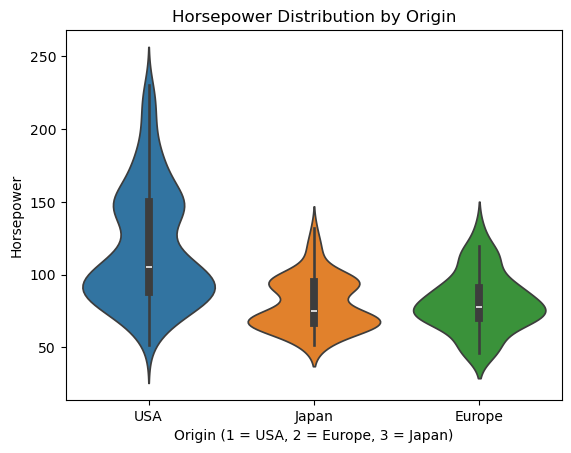

In [78]:
sns.violinplot(data= df, x='origin', y='horsepower',hue = "origin")
plt.title('Horsepower Distribution by Origin')
plt.xlabel('Origin (1 = USA, 2 = Europe, 3 = Japan)')
plt.ylabel('Horsepower')
plt.show()

### 10. What is the trend of MPG across different model years?

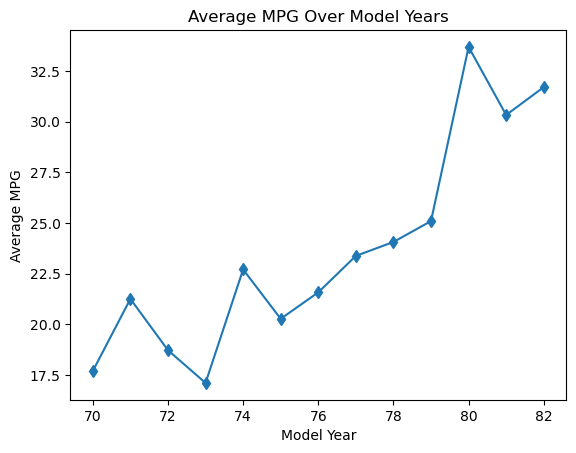

In [81]:
df.groupby('model year')['mpg'].mean().plot(kind='line', marker = "d")
plt.title('Average MPG Over Model Years')
plt.xlabel('Model Year')
plt.ylabel('Average MPG')
plt.show()

**Insight** : Average MPG (mileage/fuel economy) is increasing over years

#### 11.What is the distribution of displacement in the dataset?

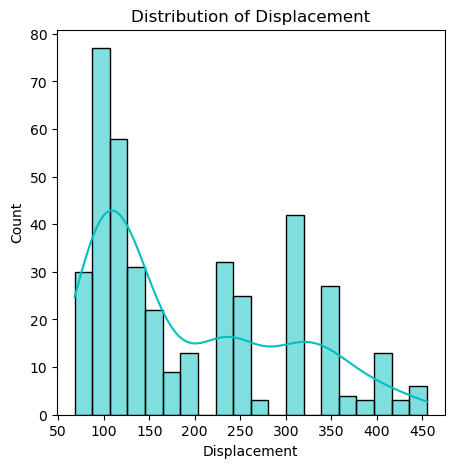

In [85]:
plt.figure(figsize = (5,5))
sns.histplot(data = df,x = "displacement",bins = 20,kde = True,color = "c")
plt.title('Distribution of Displacement')
plt.xlabel('Displacement')
plt.show()

**Insight** : Most cars have engine displacment <150 cubic inches

#### 12.How does the weight affect the mpg ?

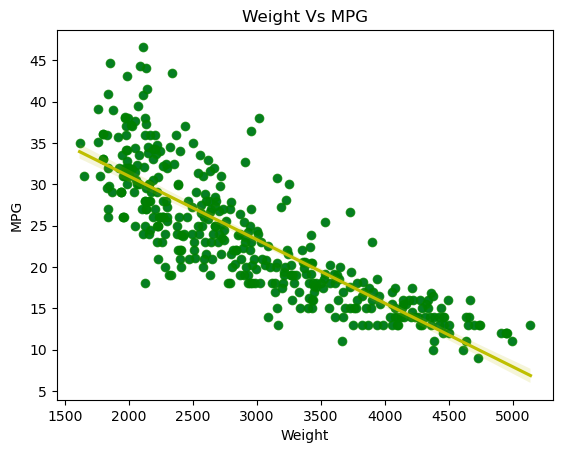

In [93]:
sns.scatterplot(data = df,x = "weight",y = "mpg")
sns.regplot(data= df, x='weight', y='mpg',scatter_kws = {"color":"g"},line_kws = {"color":"y"})
plt.title("Weight Vs MPG")
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.show()

**Insight** : Heavier cars (high weight) tend to have less mileage (mpg)

#### 13.What is the relationship between mpg and acceleration ?

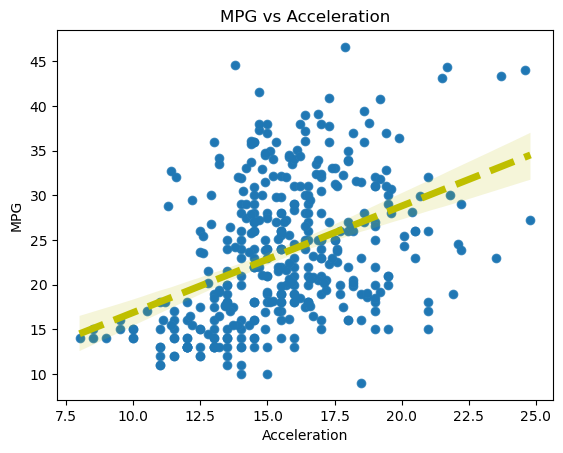

In [97]:
sns.scatterplot(data = df,y = "mpg",x = "acceleration")
sns.regplot(data = df,y = "mpg",x = "acceleration",line_kws={"color":"y","linewidth":5,
                                                             "linestyle":"--"})
plt.title('MPG vs Acceleration')
plt.xlabel('Acceleration')
plt.ylabel('MPG')
plt.show()

**Insight**:Low acceleration (time for 0-60 mph seepdup) cars tend to have high milage(mpg) but relationship is not strong

#### 14.What is the realtionship between mpg and horsepower ?

Text(0, 0.5, 'MPG')

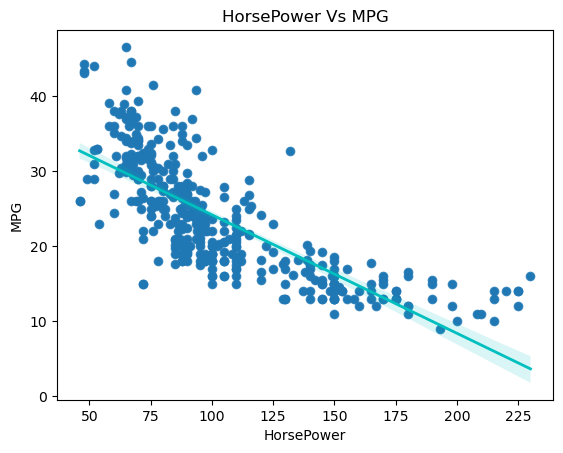

In [107]:
sns.scatterplot(data = df,x ="horsepower",y = "mpg")
sns.regplot(data = df,x="horsepower",y="mpg",line_kws ={"color":"c","linewidth":2})
plt.title("HorsePower Vs MPG")
plt.xlabel("HorsePower")
plt.ylabel("MPG")

**Insights**: Higher horsepower cars tend to have less mileage.

#### 15.Correlation among Numerical Columns

In [115]:
numerical_cols = df.select_dtypes(include=np.number)
numerical_cols.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164
horsepower,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733
weight,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137
model year,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000


<Axes: >

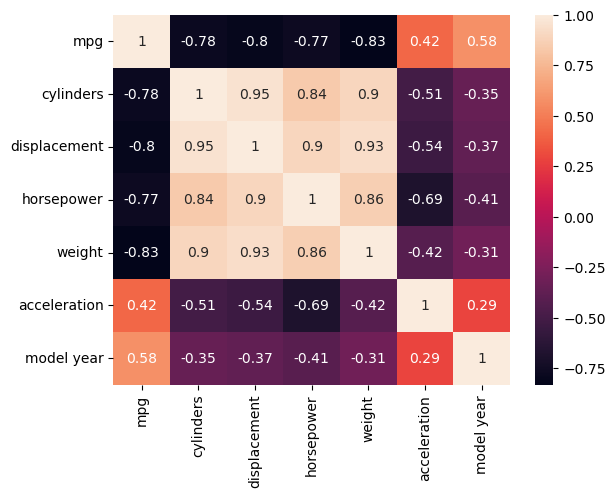

In [117]:
sns.heatmap(numerical_cols.corr(),annot=True,cbar ="Y1GrBu") ## we can change the cbar ="Y1GrBu",cmap="viridis"

**Insight** : Cylinders, displacement, horse power, weight are infleucing milegae (higher the weight less the mileage)

#### 16.What relationships can be inferred between MPG, horsepower, and weight?

<Axes: >

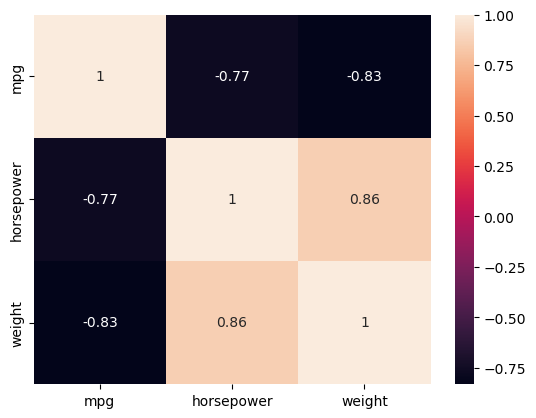

In [121]:
sns.heatmap(df[['mpg', 'horsepower', 'weight']].corr(),
           annot=True)

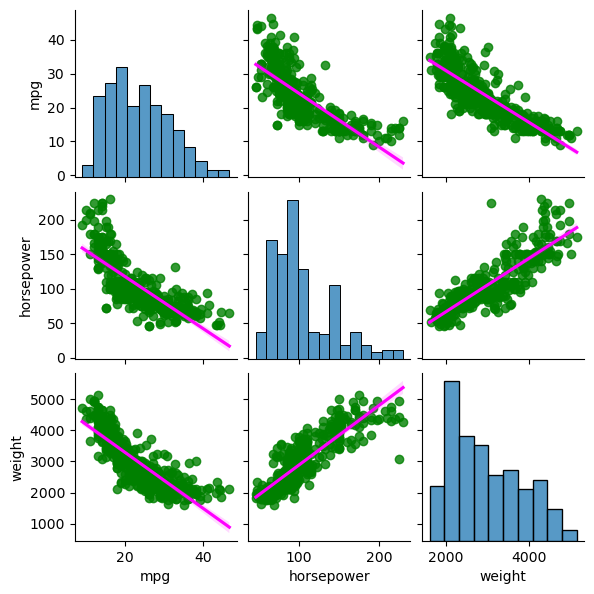

In [123]:
sns.pairplot(df[['mpg', 'horsepower', 'weight']], 
             diag_kind="hist",
             kind = "reg",
             plot_kws={"scatter_kws":{"color":"green"},
                        "line_kws" : {"color":"magenta"}
                      },
             height=2,
             aspect=1    # width = aspect * height
            )


### 17. What is the distribution of MPG for different car origins?

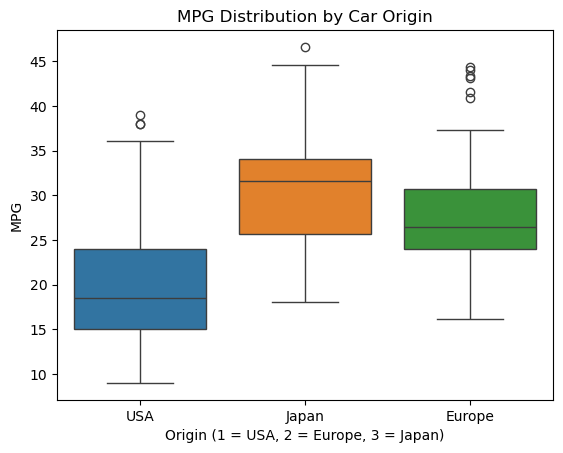

In [131]:
sns.boxplot(data= df, x='origin', y='mpg',hue = "origin")
plt.title('MPG Distribution by Car Origin')
plt.xlabel('Origin (1 = USA, 2 = Europe, 3 = Japan)')
plt.ylabel('MPG')
plt.show()

**Insight** : JAPAN tend to manufacture high mileage cars where as USA and Europe manufacture low mileage cars

#### 18. How are different car features related?

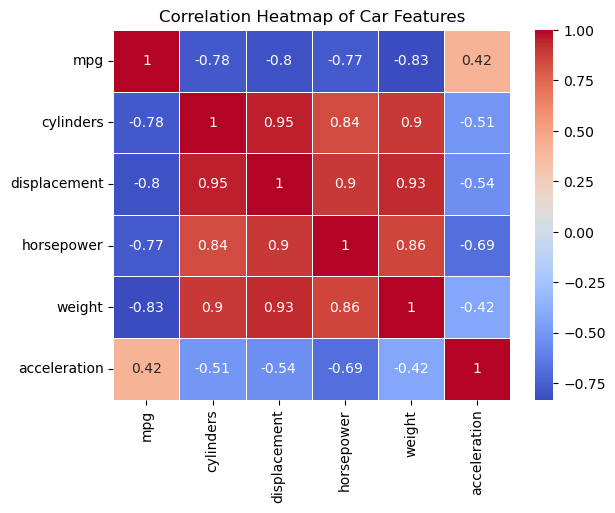

In [138]:
corr_matrix = df[['mpg', 'cylinders', 'displacement', 
                        'horsepower', 'weight','acceleration']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Car Features')
plt.show()

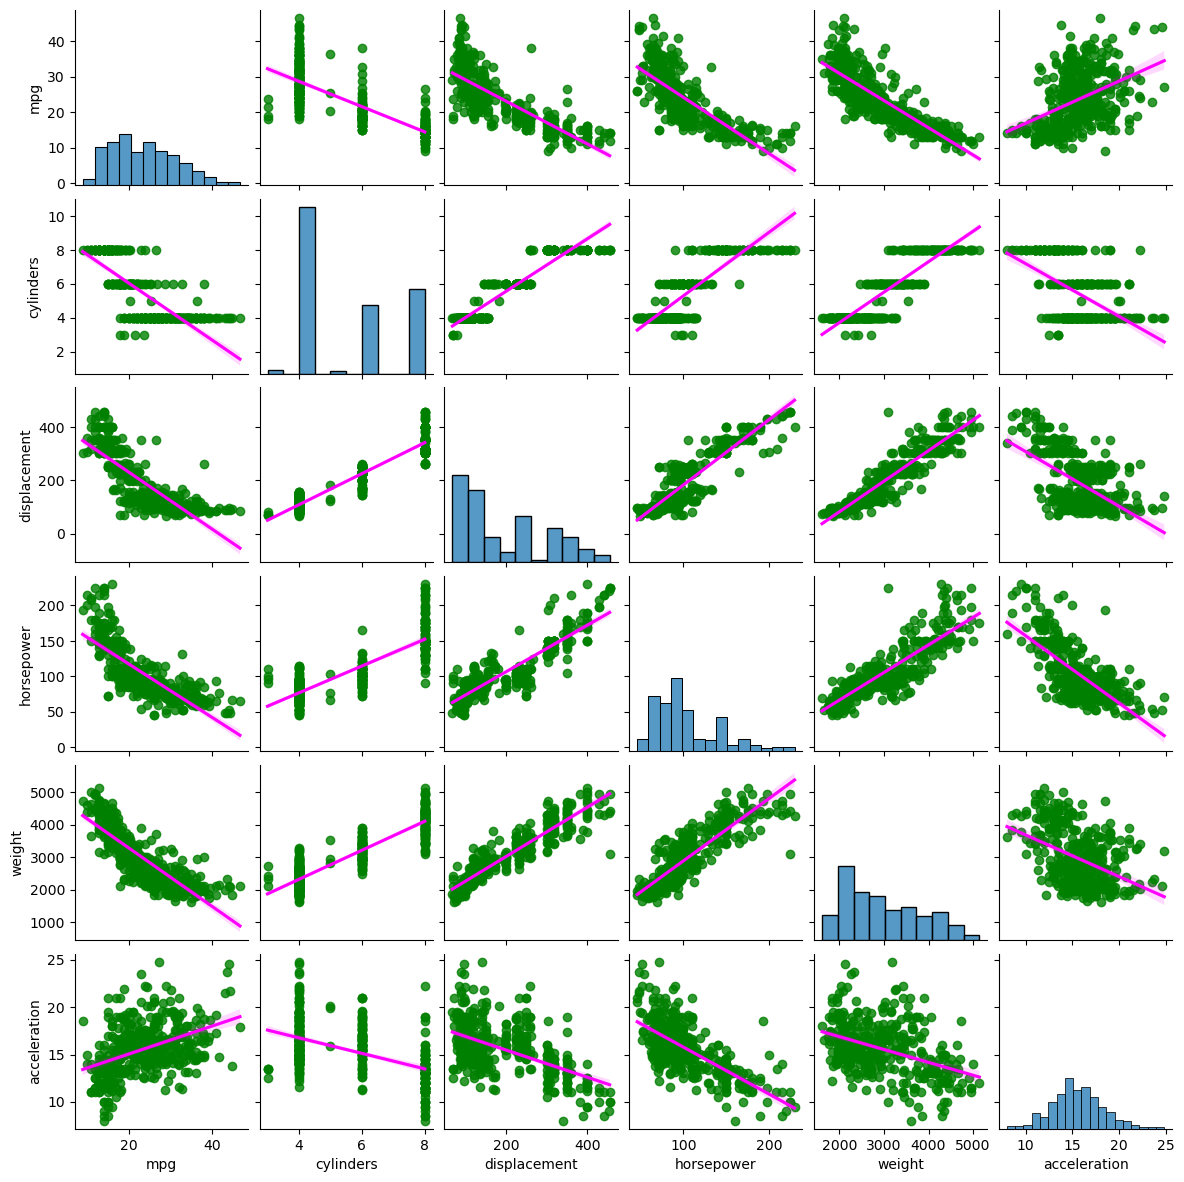

In [147]:
sns.pairplot(data = df,x_vars = ["mpg","cylinders","displacement","horsepower","weight","acceleration"],
             y_vars = ["mpg","cylinders","displacement","horsepower","weight","acceleration"],
             kind = "reg",plot_kws ={"scatter_kws":{"color":"green"},"line_kws":{"color":"magenta"}},
            height = 2,aspect = 1)

### 19. What is the distribution of acceleration among cars?

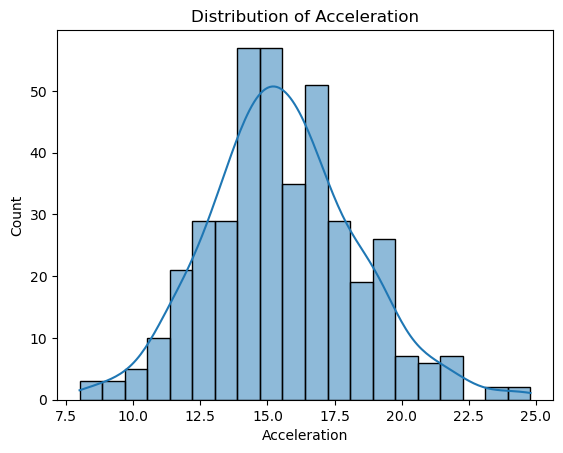

In [145]:
sns.histplot(data= df, x='acceleration', bins=20, kde=True)
plt.title('Distribution of Acceleration')
plt.xlabel('Acceleration')
plt.ylabel('Count')
plt.show()

#### 20.How does the weight of cars vary by their origin?

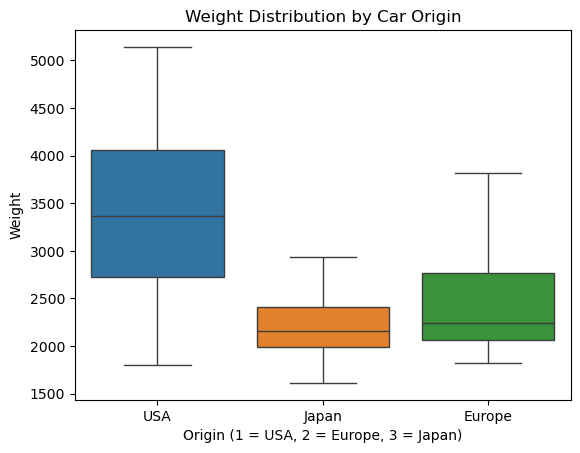

In [153]:
sns.boxplot(data= df, x='origin', y='weight',hue = "origin")
plt.title('Weight Distribution by Car Origin')
plt.xlabel('Origin (1 = USA, 2 = Europe, 3 = Japan)')
plt.ylabel('Weight')
plt.show()

**Insights** : USA tend to manfacture higher weight Cars.